In [1]:
import pandas as pd
import numpy as np

dfliquor = pd.read_csv("./Iowa_Liquor_Sales_reduced.csv")
print dfliquor.head(1)

/Users/noriogura/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         Date  Store Number       City Zip Code  County Number County  \
0  03/31/2016          5029  DAVENPORT    52806           82.0  Scott   

    Category Category Name  Vendor Number  Item Number Item Description  \
0  1022100.0       TEQUILA            370        87152     Avion Silver   

   Bottle Volume (ml) State Bottle Cost State Bottle Retail  Bottles Sold  \
0                 375             $9.99              $14.99            12   

  Sale (Dollars)  Volume Sold (Liters)  Volume Sold (Gallons)  
0        $179.88                   4.5                   1.19  


In [2]:
print dfliquor.columns.values

['Date' 'Store Number' 'City' 'Zip Code' 'County Number' 'County'
 'Category' 'Category Name' 'Vendor Number' 'Item Number'
 'Item Description' 'Bottle Volume (ml)' 'State Bottle Cost'
 'State Bottle Retail' 'Bottles Sold' 'Sale (Dollars)'
 'Volume Sold (Liters)' 'Volume Sold (Gallons)']


In [3]:
def def_count_unique(df):
    cols = pd.Series(df.columns.values) #Series of column headers
    
    y = []
    for x in df:
        z = len(np.unique(df[x]))
        y.append(z)
                    
    q = pd.DataFrame(y, index = df.columns.values, columns=["unique_s"])
    r = q.sort_values("unique_s", ascending=False)
    return r.T


In [4]:
b = def_count_unique(dfliquor)
b

/Users/noriogura/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,Sale (Dollars),County Number,Item Number,Item Description,State Bottle Retail,State Bottle Cost,Store Number,Category,Zip Code,Volume Sold (Liters),Volume Sold (Gallons),City,Date,Bottles Sold,Vendor Number,County,Category Name,Bottle Volume (ml)
unique_s,11456,11012,3865,3029,1525,1471,1403,868,771,544,538,386,284,275,159,100,74,34


In [5]:
#REORDER ORGINAL DATAFRAME WITH NEW ORDER
#print b

def def_reorder(df_orig, df_new):
    c = pd.DataFrame()
    for x in df_new.columns:
        c[x] = df_orig[x]
    return c

In [6]:
c = def_reorder(dfliquor,b)
c.head(1)

,Sale (Dollars),County Number,Item Number,Item Description,State Bottle Retail,State Bottle Cost,Store Number,Category,Zip Code,Volume Sold (Liters),Volume Sold (Gallons),City,Date,Bottles Sold,Vendor Number,County,Category Name,Bottle Volume (ml)
0,$179.88,82.0,87152,Avion Silver,$14.99,$9.99,5029,1022100.0,52806,4.5,1.19,DAVENPORT,03/31/2016,12,370,Scott,TEQUILA,375


In [7]:
dfliquor.apply(lambda x: pd.lib.infer_dtype(x.values))

Date                            string
Store Number                   integer
City                            string
Zip Code                 mixed-integer
County Number                 floating
County                           mixed
Category                      floating
Category Name                    mixed
Vendor Number                  integer
Item Number                    integer
Item Description                string
Bottle Volume (ml)             integer
State Bottle Cost               string
State Bottle Retail             string
Bottles Sold                   integer
Sale (Dollars)                  string
Volume Sold (Liters)          floating
Volume Sold (Gallons)         floating
dtype: object

In [8]:
dftypes = dfliquor.apply(lambda x: pd.lib.infer_dtype(x.values))
dftypes['Category']

'floating'

In [9]:
dataDict = pd.DataFrame(index = b.columns)
#Data DICTIONARY BELOW

col = "Description"

dataDict.ix["Date",col] ="Date sold"
dataDict.ix["Store Number",col] = "Identifier for individual store"
dataDict.ix["City",col] = "Store's location:City"
dataDict.ix["Zip Code",col] = "Store's location:Zip Code"
dataDict.ix["County Number",col] = "Store's location:County Number"
dataDict.ix["County",col] = "County Name"
dataDict.ix["Category",col] = "Liquor Category Number for Name"
dataDict.ix["Category Name",col] = "Liquor Category Name"
dataDict.ix["Vendor Number",col] = "Vendor Number"
dataDict.ix["Item Number", col] = "Item Number for Specific Item"
dataDict.ix["Item Description", col] = "Specific liquor item name"
dataDict.ix["Bottle Volume (ml)",col] = "Volume of a bottle in ml"
dataDict.ix["State Bottle Cost",col] = "Bottle cost for vendor"
dataDict.ix["State Bottle Retail",col] = "Bottle retail price"
dataDict.ix["Bottles Sold",col] = "Number of bottles sold to vendor"
dataDict.ix["Sale (Dollars)",col] = "Total Sale in dollars"
dataDict.ix["Volume Sold (Liters)", col] = "Total Volume Sold in liters"
dataDict.ix["Volume Sold (Gallons)", col] = "Total Volume Sold in gallons"

col = "variable"

dataDict.ix["Date",col] ="ordinal"
dataDict.ix["Store Number",col] = "categorical"
dataDict.ix["City",col] = "categorical"
dataDict.ix["Zip Code",col] = "categorical"
dataDict.ix["County Number",col] = "categorical"
dataDict.ix["County",col] = "categorical"
dataDict.ix["Category",col] = "categorical"
dataDict.ix["Category Name",col] = "categorical"
dataDict.ix["Vendor Number",col] = "categorical"
dataDict.ix["Item Number", col] = "categorical"
dataDict.ix["Item Description", col] = "categorical"
dataDict.ix["Bottle Volume (ml)",col] = "ordinal"
dataDict.ix["State Bottle Cost",col] = "ordinal"
dataDict.ix["State Bottle Retail",col] = "ordinal"
dataDict.ix["Bottles Sold",col] = "ordinal"
dataDict.ix["Sale (Dollars)",col] = "ordinal"
dataDict.ix["Volume Sold (Liters)", col] = "ordinal"
dataDict.ix["Volume Sold (Gallons)", col] = "ordinal"

col_a = "unique_count"
col_b = "example"
col_c = "types"

for i,x in enumerate(b): #unique counts dataframe
    dataDict.ix[x, col_a] = b.ix[0,x] #counts
    dataDict.ix[x, col_b] = dfliquor.ix[0,x] #original
    dataDict.ix[x, col_c] = dftypes.ix[x,0]
    #print x
dataDict = dataDict.T
dataDict

,Sale (Dollars),County Number,Item Number,Item Description,State Bottle Retail,State Bottle Cost,Store Number,Category,Zip Code,Volume Sold (Liters),Volume Sold (Gallons),City,Date,Bottles Sold,Vendor Number,County,Category Name,Bottle Volume (ml)
Description,Total Sale in dollars,Store's location:County Number,Item Number for Specific Item,Specific liquor item name,Bottle retail price,Bottle cost for vendor,Identifier for individual store,Liquor Category Number for Name,Store's location:Zip Code,Total Volume Sold in liters,Total Volume Sold in gallons,Store's location:City,Date sold,Number of bottles sold to vendor,Vendor Number,County Name,Liquor Category Name,Volume of a bottle in ml
variable,ordinal,categorical,categorical,categorical,ordinal,ordinal,categorical,categorical,categorical,ordinal,ordinal,categorical,ordinal,ordinal,categorical,categorical,categorical,ordinal
unique_count,11456,11012,3865,3029,1525,1471,1403,868,771,544,538,386,284,275,159,100,74,34
example,$179.88,82,87152,Avion Silver,$14.99,$9.99,5029,1.0221e+06,52806,4.5,1.19,DAVENPORT,03/31/2016,12,370,Scott,TEQUILA,375
types,string,floating,integer,string,string,string,integer,floating,mixed-integer,floating,floating,string,string,integer,integer,mixed,mixed,integer


In [10]:
c.sort_values(by=['Date','Vendor Number','County'])

,Sale (Dollars),County Number,Item Number,Item Description,State Bottle Retail,State Bottle Cost,Store Number,Category,Zip Code,Volume Sold (Liters),Volume Sold (Gallons),City,Date,Bottles Sold,Vendor Number,County,Category Name,Bottle Volume (ml)
517845,$33.00,50.0,80034,Brown Jug Bourbon Cream,$16.50,$11.00,4604,1081200.0,50208,1.50,0.40,NEWTON,01/04/2016,2,10,Jasper,CREAM LIQUEURS,750
511992,$8.31,1.0,43121,Bacardi Superior Rum Mini,$8.31,$5.54,4654,1062200.0,50250,0.50,0.13,STUART,01/04/2016,1,35,Adair,PUERTO RICO & VIRGIN ISLANDS RUM,500
514346,$892.08,5.0,43136,Bacardi Limon,$12.39,$8.26,5173,1062300.0,50025,54.00,14.27,AUDUBON,01/04/2016,72,35,Audubon,FLAVORED RUM,750
511979,$8.31,7.0,43121,Bacardi Superior Rum Mini,$8.31,$5.54,2643,1062200.0,50701,0.50,0.13,WATERLOO,01/04/2016,1,35,Black Hawk,PUERTO RICO & VIRGIN ISLANDS RUM,500
512035,$7.50,7.0,43123,Bacardi Superior Rum,$3.75,$2.50,2538,1062200.0,50702,0.40,0.11,WATERLOO,01/04/2016,2,35,Black Hawk,PUERTO RICO & VIRGIN ISLANDS RUM,200
512071,$7.50,7.0,43123,Bacardi Superior Rum,$3.75,$2.50,2643,1062200.0,50701,0.40,0.11,WATERLOO,01/04/2016,2,35,Black Hawk,PUERTO RICO & VIRGIN ISLANDS RUM,200
512430,$22.50,7.0,34359,Grey Goose Vodka,$7.50,$5.00,2643,1032080.0,50701,0.60,0.16,WATERLOO,01/04/2016,3,35,Black Hawk,IMPORTED VODKA,200
512906,$202.50,7.0,34422,Grey Goose Vodka,$33.75,$22.50,3494,1032080.0,50702,6.00,1.59,WATERLOO,01/04/2016,6,35,Black Hawk,IMPORTED VODKA,1000
512913,$405.00,7.0,34422,Grey Goose Vodka,$33.75,$22.50,2643,1032080.0,50701,12.00,3.17,WATERLOO,01/04/2016,12,35,Black Hawk,IMPORTED VODKA,1000
513060,$24.78,7.0,43126,Bacardi Superior Rum,$12.39,$8.26,4222,1062200.0,50707,1.50,0.40,EVANSDALE,01/04/2016,2,35,Black Hawk,PUERTO RICO & VIRGIN ISLANDS RUM,750


In [11]:
#Clean up Column Names
def d_rid_dots(t):
    z0=[x.replace("(","") for x in t]
    return z0

def d_rid_dots2(t):
    z0=[x.replace(")","") for x in t]
    return z0

import re

def d_rid_dots3(t):
    z0=[re.sub(r'[^\x00-\x7f]',r'',x) for x in t]
    print 
    #z0=[x.replace(")","") for x in t]
    return z0

c.columns = d_rid_dots(c.columns.values.tolist()) 
c.columns = d_rid_dots2(c.columns.values.tolist()) 

c.head(1)

,Sale Dollars,County Number,Item Number,Item Description,State Bottle Retail,State Bottle Cost,Store Number,Category,Zip Code,Volume Sold Liters,Volume Sold Gallons,City,Date,Bottles Sold,Vendor Number,County,Category Name,Bottle Volume ml
0,$179.88,82.0,87152,Avion Silver,$14.99,$9.99,5029,1022100.0,52806,4.5,1.19,DAVENPORT,03/31/2016,12,370,Scott,TEQUILA,375


In [12]:
c['Sale Dollars'] = c['Sale Dollars'].map(lambda x: x.replace('$',''))
c['Sale Dollars'] = c['Sale Dollars'].map(lambda x: float(x))

c['State Bottle Retail'] = c['State Bottle Retail'].map(lambda x: x.replace('$',''))
c['State Bottle Retail'] = c['State Bottle Retail'].map(lambda x: float(x))

c['State Bottle Cost'] = c['State Bottle Cost'].map(lambda x: x.replace('$',''))
c['State Bottle Cost'] = c['State Bottle Cost'].map(lambda x: float(x))

In [13]:
#small.sort_values(by=['Category Name','Category'])
c.isnull().sum()

Sale Dollars               0
County Number          10913
Item Number                0
Item Description           0
State Bottle Retail        0
State Bottle Cost          0
Store Number               0
Category                 779
Zip Code                   0
Volume Sold Liters         0
Volume Sold Gallons        0
City                       0
Date                       0
Bottles Sold               0
Vendor Number              0
County                 10913
Category Name           6109
Bottle Volume ml           0
dtype: int64

In [14]:
#Lookup table no nulls
lookup = c.dropna(axis=0)
lookup.head(10)
print lookup.shape

lookup.isnull().sum()

(2692602, 18)


Sale Dollars           0
County Number          0
Item Number            0
Item Description       0
State Bottle Retail    0
State Bottle Cost      0
Store Number           0
Category               0
Zip Code               0
Volume Sold Liters     0
Volume Sold Gallons    0
City                   0
Date                   0
Bottles Sold           0
Vendor Number          0
County                 0
Category Name          0
Bottle Volume ml       0
dtype: int64

In [15]:
chop_c= c.drop('County Number', axis=1)
chop_c= chop_c.drop('County', axis=1)
chop_c.isnull().sum()
print chop_c.shape

(2709552, 16)


In [16]:
LUT_county = pd.DataFrame()
LUT_county['City'] = lookup['City']
LUT_county['County'] = lookup['County']
LUT_county['County Number'] = lookup['County Number']
#print LUT_county.shape

keys = ['City','County','County Number']
grouped = LUT_county.groupby(keys)
index = [gp_keys[0] for gp_keys in grouped.groups.values()]
new_df = LUT_county.reindex(index)
LUT_county = new_df

#print LUT_county.shape

s1 = pd.merge(chop_c, LUT_county, how='left', on='City')
#print s1.isnull().sum()
#ALMOST BUT NOT QUITE GONE...

mask = s1['County'].isnull()
s2 = pd.DataFrame()
s2 = s1[mask]
#print(s1.loc[s1['County'].isnull])
print s2['City'].unique() #Problem cities

['SEYMOUR' 'TABOR' 'RUNNELLS']


In [17]:
#Seymour = Wayne County
#Tabor = Fremont County
#Runnells = Polk County
#add to Look Up Table, info from Google

df = pd.DataFrame([["SEYMOUR", "Wayne", 93.0],["TABOR", "Fremont", 36.0],["RUNNELLS", "Polk", 77.0]], columns=LUT_county.columns)
LUT_county = LUT_county.append(df)
print df
print LUT_county.loc[LUT_county['County'].isin(['Wayne','Fremont','Polk'])]

       City   County  County Number
0   SEYMOUR    Wayne           93.0
1     TABOR  Fremont           36.0
2  RUNNELLS     Polk           77.0
                   City   County  County Number
7246            ALTOONA     Polk           77.0
8                ANKENY     Polk           77.0
91286          HUMESTON    Wayne           93.0
18658             CLIVE     Polk           77.0
16            URBANDALE     Polk           77.0
59451           HAMBURG  Fremont           36.0
28104         BONDURANT     Polk           77.0
154471        CAMBRIDGE     Polk           77.0
7080    WINDSOR HEIGHTS     Polk           77.0
18603         POLK CITY     Polk           77.0
946          Des Moines     Polk           77.0
47072           CORYDON    Wayne           93.0
783     WEST DES MOINES     Polk           77.0
3            DES MOINES     Polk           77.0
7103      PLEASANT HILL     Polk           77.0
18545            GRIMES     Polk           77.0
58152         Urbandale     Polk        

In [18]:
print LUT_county.shape

s1 = pd.merge(chop_c, LUT_county, how='left', on='City')
print s1.isnull().sum()
print s1.shape
#Got rid of County related Nulls!

(397, 3)
Sale Dollars              0
Item Number               0
Item Description          0
State Bottle Retail       0
State Bottle Cost         0
Store Number              0
Category                870
Zip Code                  0
Volume Sold Liters        0
Volume Sold Gallons       0
City                      0
Date                      0
Bottles Sold              0
Vendor Number             0
Category Name          6697
Bottle Volume ml          0
County                    0
County Number             0
dtype: int64
(2925506, 18)


In [19]:
#For now, drop Liquor Category

s1 = s1.drop('Category', axis=1)
s1 = s1.drop('Category Name', axis=1)

In [20]:
#Calculate Cost for Vendor
def calc_margin(df):
    a = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']
    return a

s1['Margin'] = s1.apply(calc_margin, axis=1)



In [21]:
s1.head(1)

,Sale Dollars,Item Number,Item Description,State Bottle Retail,State Bottle Cost,Store Number,Zip Code,Volume Sold Liters,Volume Sold Gallons,City,Date,Bottles Sold,Vendor Number,Bottle Volume ml,County,County Number,Margin
0,179.88,87152,Avion Silver,14.99,9.99,5029,52806,4.5,1.19,DAVENPORT,03/31/2016,12,370,375,Scott,82.0,60.0


In [22]:
# Convert dates
s1["Date"] = pd.to_datetime(s1["Date"], format="%m/%d/%Y")

In [23]:
#Trim it more - by city only, and date, Margin
s2d = pd.DataFrame()
s2d["City"] = s1['City']
s2d["Margin"] = s1['Margin']
s2d["Month"] = s1['Date'].dt.month
s2d["Year"] = s1['Date'].dt.year
s2d["Bottles Sold"] = s1['Bottles Sold']

s2d.head(1)


,City,Margin,Month,Year,Bottles Sold
0,DAVENPORT,60.0,3,2016,12


In [25]:
## What are the biggest markets?
## group by City, Sorty by Margin to get top 10

subset = s2d.groupby(["City"]).agg({'Margin':sum})
subset.sort_index(by=['Margin'], ascending = False, inplace=True)
subset_df = pd.DataFrame(subset).reset_index()
subset_dfa0 = subset_df

#Just get first 10
subset_df = subset_df.iloc[:10]

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


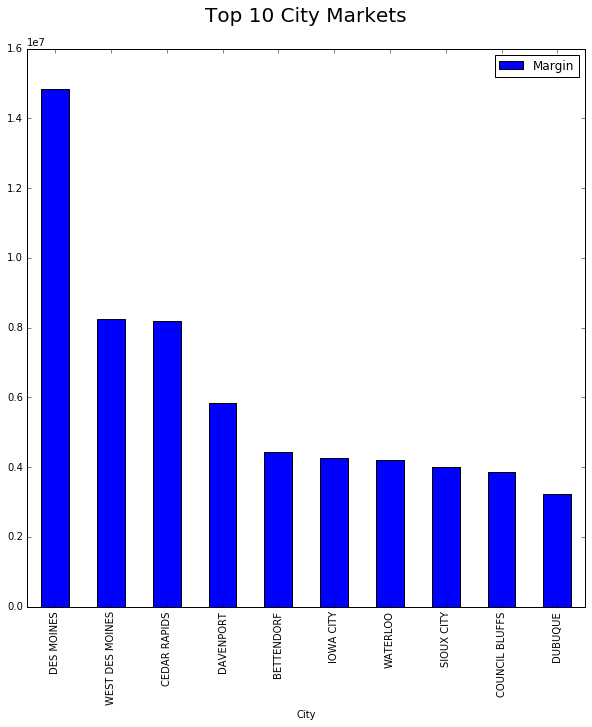

In [26]:
#Bar Plot of Top 10

from matplotlib import pyplot as plt
%matplotlib inline 
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
my_plot = subset_df.plot(x="City", y="Margin", kind='bar')
my_plot.set_title('Top 10 City Markets\n', fontsize=20)


In [27]:
#Change over time, of Top City
a = ["DES MOINES","WEST DES MOINES","CEDAR RAPIDS","DAVENPORT"]
subset2 = s2d[s2d["City"].isin(a)]
subset2 = subset2.groupby(["City", "Year","Month"]).agg({'Margin':sum})
subset2_df = pd.DataFrame(subset2).reset_index()

subset2_df.sort_index(by=['City','Year','Month'], ascending = True, inplace=True)

#z = subset2_df[subset2_df['City'] == "DES MOINES"]["Margin"]
#y.head(10)


/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [28]:
subset2_df.head(2)

,City,Year,Month,Margin
0,CEDAR RAPIDS,2015,1,403330.19
1,CEDAR RAPIDS,2015,2,523748.45


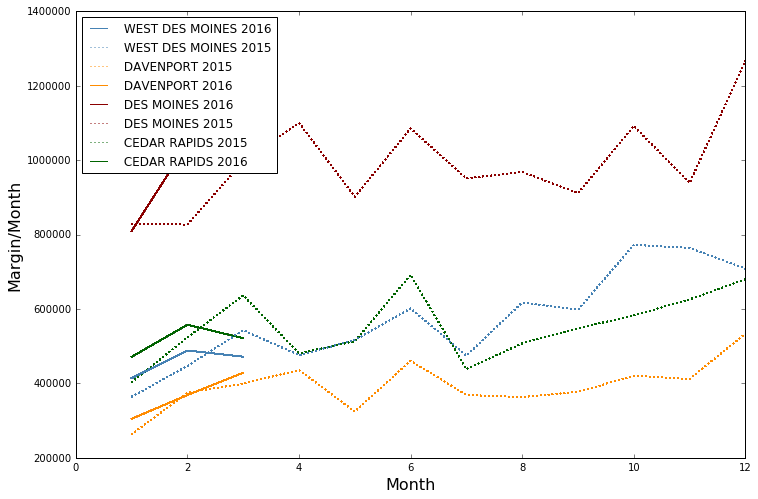

In [29]:
#print subset2_df.head(20)

cities = subset2_df.City.values
seq_year = subset2_df.Year.values

seq_month = subset2_df.Month.values
total_margin = subset2_df.Margin.values

#plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()


for g in cities:
    
    if g == 'DES MOINES':
        color = 'darkred'
    elif g == 'WEST DES MOINES':
        color = 'steelblue'
    elif g == 'CEDAR RAPIDS':
        color = 'darkgreen'
    elif g == 'DAVENPORT':
        color = 'darkorange'
            
    for r in seq_year:
        
        if r == 2015:            
            linestyle = ':'
        elif r == 2016:
            linestyle = '-' 
        
        current_cities = [x for x, g_, r_ in zip(seq_month, cities, seq_year) if g_ == g and r_ == r]
        current_margin = [y for y, g_, r_ in zip(total_margin, cities, seq_year) if g_ == g and r_ == r]

        axes.plot(current_cities, current_margin, linestyle=linestyle, c=color, label=' '+g+" "+str(r))
        
        
axes.set_xlabel('Month', fontsize=16)
axes.set_ylabel('Margin/Month', fontsize=16)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')

USED CODE FROM Data Workflow Lab 1 Solutions for Quarter Breakdown


In [30]:
#######################
#USED CODE FROM Data Workflow Lab 1 Solutions for Quarter Breakdown - I know it's redundant, but I was learning...
######################

% matplotlib inline

from collections import defaultdict
import datetime

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model

#Load the data

df = pd.read_csv("/Users/noriogura/Desktop/old-DSI-SF-1-NORI/projects/project-03/Iowa_Liquor_Sales_reduced.csv")

print df.columns

# Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]

# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))
    
# Convert dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Drop bad values
df = df.dropna()

# Convert integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)
df.head()

# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling
lower_cutoff = pd.Timestamp("20150301")

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


In [31]:
######################################################
#CHANGED to include 2016 Q1
######################################################
upper_cutoff = pd.Timestamp("20160201")

mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)
good_stores = dates[mask]["Store Number"]
df = df[df["Store Number"].isin(good_stores)]

# Margin
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
df["Price per Liter"] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2016-03-31,5029,DAVENPORT,52806,82,1022100,370,87152,375,9.99,14.99,12,179.88,4.50,1.19,60.00,39.973333
1,2016-03-31,5029,DAVENPORT,52806,82,1022100,395,89197,1000,12.50,18.75,2,37.50,2.00,0.53,12.50,18.750000
2,2016-03-31,4959,CEDAR FALLS,50613,7,1071100,380,63959,1750,5.97,8.96,6,53.76,10.50,2.77,17.94,5.120000
3,2016-03-31,2190,DES MOINES,50314,77,1031200,205,40597,200,2.24,3.36,48,161.28,9.60,2.54,53.76,16.800000
5,2016-03-31,4988,CEDAR FALLS,50613,7,1011200,260,17090,750,23.00,34.50,1,34.50,0.75,0.20,11.50,46.000000


In [32]:
#######################
#USED CODE FROM Data Workflow Lab 1 Solutions for Quarter Breakdown
######################
# Sales per store, 2015

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")

#Modified to include 2016 Q1
end_date = pd.Timestamp("20160301")

mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns
sales.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# Quick check
sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
0,2106,CEDAR FALLS,1642632.06,279.596946,7,18.741523,50613,107737.42,18.338284,93.304196
1,2113,GOWRIE,99150.51,62.398055,94,17.626604,50543,7476.67,4.705267,20.873531
2,2130,WATERLOO,1297042.45,283.382663,7,17.435457,50703,76704.23,16.758626,94.530771
3,2152,ROCKWELL,81388.11,49.236606,17,13.195352,50469,6964.31,4.213134,16.493787
4,2178,WAUKON,312196.87,103.273857,3,16.611700,52172,24469.06,8.094297,34.628419


In [33]:
#######################
#ADDED MY CODE FOR OTHER QUARTERS
######################

# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q1"] = df2["Sale (Dollars)"]

print df2["Sale (Dollars)"].shape
print sales.shape

# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160401")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] < end_date)

df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
df2["2016 Sales Q1"] = df2["Sale (Dollars)"]

sales = sales.merge(df2[['Store Number', '2016 Sales Q1']], 
                                  how='outer', on='Store Number',suffixes=['_orig', ''])

###CHECKING CODE#########
print sales[sales['Store Number']==2633]



# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q1"] = df2["Sale (Dollars)"]

# Added 2015, Q2
start_date = pd.Timestamp("20150401")
end_date = pd.Timestamp("20150701")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] < end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q2"] = df2["Sale (Dollars)"]

# Added 2015, Q3
start_date = pd.Timestamp("20150701")
end_date = pd.Timestamp("20151001")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] < end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q3"] = df2["Sale (Dollars)"]

# Added 2015, Q4
start_date = pd.Timestamp("20151001")
end_date = pd.Timestamp("20160101")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] < end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q4"] = df2["Sale (Dollars)"]



(1162,)
(1162, 11)
     Store Number        City   2015 Sales  2015 Sales mean  County Number  \
119          2633  DES MOINES  11356985.12       504.239449             77   

     Price per Liter mean Zip Code  2015 Volume Sold (Liters)  \
119             21.177392    50320                  672914.48   

     2015 Volume Sold (Liters) mean  2015 Margin mean  2015 Sales Q1  \
119                        29.87677        168.196519     2337324.42   

     2016 Sales Q1  
119     2443253.18  


In [34]:
#######FROM HERE ON, ADDED MORE OF MY CODE #####################
# 1) Hypothesis: Can we predict 2016 Margins from 2015 Margins?
# 2) Hypothesis: Is there a linear relationship between the change of 2016 Margins to 2015 Margins?

In [35]:
#DELTA SALES
sales['2015 Quarterly Change'] = sales['2015 Sales Q4'] - sales['2015 Sales Q1']
#Change over 3 quarters
sales['2015 Avg Quarterly Slope'] = sales['2015 Quarterly Change']/3

sales['2016 Avg Quarterly Slope'] = (sales['2016 Sales Q1'] - sales['2015 Sales Q1'])/4


(0, 50000)

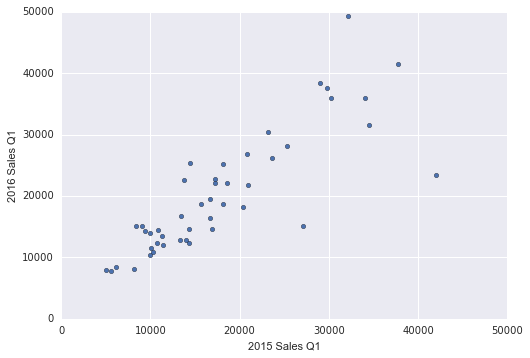

In [36]:
### Take Sales.head() and group by cities - DES MOINES
sales_DES_MOINES= sales[sales["City"]=="DES MOINES"]
# Quick plot to check the computations
sales_DES_MOINES.plot(kind='scatter', x="2015 Sales Q1", y="2016 Sales Q1");
plt.xlim(0, 50000)
plt.ylim(0, 50000)
#This has a very large Range/Variance

Model fit: 0.998143642444
[ 1.0766816] [ 1200.46085408]


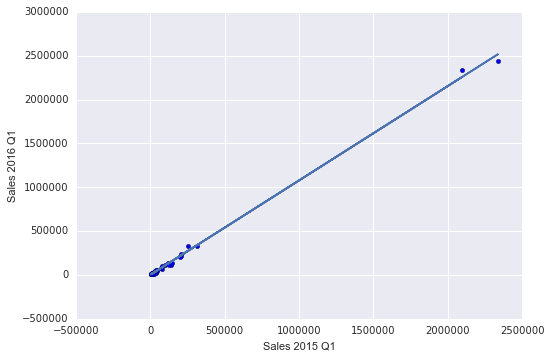

In [37]:
# Fit a model for DES MOINES

sales_DES_MOINES= sales[sales["City"]=="DES MOINES"]

lm = linear_model.LinearRegression()
X = sales_DES_MOINES[["2015 Sales Q1"]]
y = sales_DES_MOINES[["2016 Sales Q1"]]
lm.fit(X, y)

predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)
print lm.coef_[0], lm.intercept_

# Plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales 2015 Q1")
plt.ylabel("Sales 2016 Q1")
plt.show()


Model fit: 0.933364124684
[ 0.85126336] [ 8265.80210102]


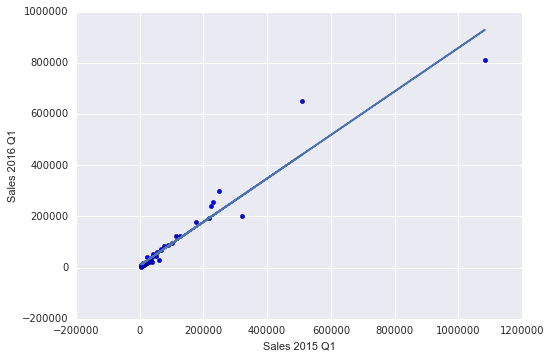

In [38]:
#CEDAR RAPIDS

sales_CEDAR_RAPIDS= sales[sales["City"]=="CEDAR RAPIDS"]

lm = linear_model.LinearRegression()
X = sales_CEDAR_RAPIDS[["2015 Sales Q1"]]
y = sales_CEDAR_RAPIDS[["2016 Sales Q1"]]
lm.fit(X, y)

predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)
print lm.coef_[0], lm.intercept_

# Plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales 2015 Q1")
plt.ylabel("Sales 2016 Q1")
plt.show()


In [39]:
############################
# 1) Hypothesis: Can we predict 2016 Margins from 2015 Margins?
# THE FIT IS PRETTY GOOD, especially on a City basis, so can use Avg 2015 Margins per City to predict for 2016

Model fit: 0.468458046207
[ 0.37245199] [-386.76211498]


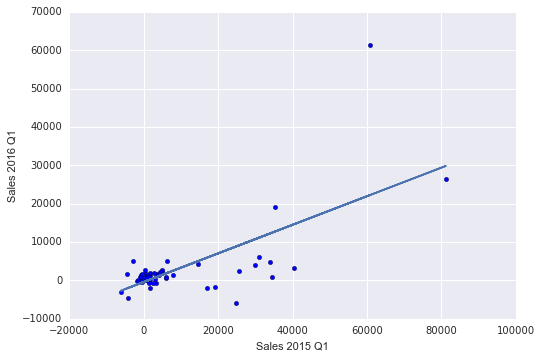

In [40]:
sales.head(1)

# Fit a model for DES_MOINES CHANGE IN SALES!!!
sales_DES_MOINES= sales[sales["City"]=="DES MOINES"]

lm = linear_model.LinearRegression()
X = sales_DES_MOINES[["2015 Avg Quarterly Slope"]]
y = sales_DES_MOINES[["2016 Avg Quarterly Slope"]]
lm.fit(X, y)

predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)
print lm.coef_[0], lm.intercept_

# Plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales 2015 Q1")
plt.ylabel("Sales 2016 Q1")
plt.show()


In [41]:
############################
# 2) Hypothesis: Is there a linear relationship between the change of 2016 Margins to 2015 Margins?
# Kind of but, not regression fit is not that good. Try to improve...

Let's see if we can get a better fit by looking at time regression for each individual store, and group by city

In [42]:
sales_outlier= sales[sales["2016 Avg Quarterly Slope"]> 60000]
sales_outlier

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,2015 Sales Q2,2015 Sales Q3,2015 Sales Q4,2015 Quarterly Change,2015 Avg Quarterly Slope,2016 Avg Quarterly Slope
951,4829,DES MOINES,10203636.99,481.962921,77,21.78887,50314,584429.78,27.605204,160.760632,2097466.57,2342751.22,2267284.12,2098393.02,2279635.60,182169.03,60723.01,61321.1625
1156,5102,MOUNT VERNON,2319011.90,292.619798,57,19.85286,52314,163988.20,20.692517,97.620604,321939.78,602233.83,532410.59,59920.44,57101.76,-264838.02,-88279.34,70073.5125


In [43]:
from datetime import date
day1 = date(2015, 1, 1)
day1

datetime.date(2015, 1, 1)

In [44]:
##### Let's redo this on a Store basis, Linear regression Sales vs. Time, to predict Change in Sales for Q1 2016

df.head()

Store_sales= pd.DataFrame()
Store_sales["Store Number"] = df["Store Number"] 
Store_sales["Sale"] = df["Sale (Dollars)"]
Store_sales["Date"] = pd.to_datetime(df["Date"]) #, format="%m/%d/%Y")

store_numbers = Store_sales["Store Number"].unique()
#store_numbers = [2633]

subset = Store_sales.groupby(["Store Number","Date"]).agg({'Sale':sum})
subset_df = pd.DataFrame(subset).reset_index()
subset_df

lm = linear_model.LinearRegression()
lm2015 = linear_model.LinearRegression()

#Intercept, Slope, Regression Fit for each store, Up to what Year (2016 includes 2015)
LM_store = pd.DataFrame(index = ["Store Number", "B0_2016","B1_2016","score_2016", "B0_2015","B1_2015","score_2015"]) 

for x in store_numbers: 
    my_store = x

    masked = Store_sales[Store_sales["Store Number"] == my_store]

    X1= pd.DataFrame()
    X1['datedelta'] = masked["Date"] - day1
    X1['datedelta'] = X1['datedelta'].map(lambda x: x.total_seconds()) #Convert to float seconds
    X1['datedelta'] = X1['datedelta'].map(lambda x: x / 86400) #86400 seconds/day, Convert to days
    X1['datedelta'] = X1['datedelta'].map(lambda x: x // 7) #86400 Integer divison 7days/week, Convert to weeks
    X1['Sale'] = masked["Sale"]
    
    subset = X1.groupby(["datedelta"]).agg({'Sale':sum}) #Group Sales by Week
    subset_df = pd.DataFrame(subset).reset_index()

    #mask for only 2015
    mask = subset_df["datedelta"] < 52 #52 weeks in 1 year 
    subset2015 = subset_df[mask]
    
    X2016 = subset_df[['datedelta']]
    y2016 = subset_df[['Sale']]

    X2015 = subset2015[['datedelta']]
    y2015 = subset2015[['Sale']]
    
    lm.fit(X2016, y2016)
    lm2015.fit(X2015, y2015)

    LM_store.loc["Store Number", my_store] = my_store #Store Number
    LM_store.loc["B0_2016", my_store] = lm.intercept_ #Jan 1, 2015 Starting point
    LM_store.loc["B1_2016", my_store] = lm.coef_[0] #increase in sales/week
    LM_store.loc["score_2016", my_store] = lm.score(X2016,y2016) #Linear regression fit
    LM_store.loc["B0_2015", my_store] = lm2015.intercept_ #Jan 1, 2015 Starting point
    LM_store.loc["B1_2015", my_store] = lm2015.coef_[0] #increase in sales/week
    LM_store.loc["score_2015", my_store] = lm.score(X2015,y2015) #Linear regression fit

#print LM_store
LM_store = LM_store.T

In [45]:
# Add City info Back to LM_store

LUT_City = pd.DataFrame()
LUT_City['City'] = df['City']
LUT_City['Store Number'] = df['Store Number']

keys = ['City','Store Number']
grouped = LUT_City.groupby(keys)
index = [gp_keys[0] for gp_keys in grouped.groups.values()]
new_df = LUT_City.reindex(index)
LUT_City = new_df

LM_store = pd.merge(LM_store, LUT_City, how='left', on='Store Number')

LM_store["Growth"] = LM_store["B1_2016"].map(lambda x: 1 if x > 0.1 else 0)
LM_store["Store_count"] = 1
LM_store.head(5)

,Store Number,B0_2016,B1_2016,score_2016,B0_2015,B1_2015,score_2015,City,Growth,Store_count
0,2106.0,28840.851366,-8.072671,0.000597,26992.137054,88.912390,-0.015843,CEDAR FALLS,0,1
1,2113.0,1980.044650,-6.624775,0.051794,2033.438028,-9.465712,0.053989,GOWRIE,0,1
2,2130.0,21732.795892,33.511839,0.008201,21601.478493,39.674815,0.007153,WATERLOO,1,1
3,2152.0,1538.886061,-3.711669,0.023332,1465.740083,0.206780,-0.021170,ROCKWELL,0,1
4,2178.0,5053.181930,4.072613,0.003734,4595.699028,29.420521,0.009683,WAUKON,1,1


Model fit: 0.569477987038
[ 0.38620531] [ 0.27200041]


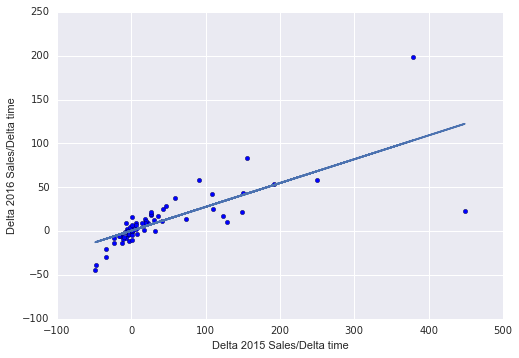

In [46]:
# Fit a model for growth up to 2015 for growth up to 2016
LM_store_city = LM_store[LM_store['City'] == "DES MOINES"]

lm = linear_model.LinearRegression()
X = LM_store_city[["B1_2015"]]
y = LM_store_city[["B1_2016"]]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)
print lm.intercept_, lm.coef_[0]

# Plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Delta 2015 Sales/Delta time")
plt.ylabel("Delta 2016 Sales/Delta time")
plt.show()

#Slightly better fit for individual cities than earlier model

Outliers are throwing off the model... but, don't want to throw them away. It could be true. Some stores may be seeing saturation. 
Can't tell because not much 2016 data, and could be seasonality dip of Q1.

2) Hypothesis: Is there a linear relationship between the change of 2016 Margins to 2015 Margins?
Close enough?

In [47]:
# Group LM Model By City
# Can be smarter about this with aggregate function on different columns all at once, but...


subset = LM_store.groupby(["City"]).agg({'Growth':sum}) #Group Sales by Week
subset_df0 = pd.DataFrame(subset).reset_index()

LM_summary = pd.DataFrame() #Summary dataframe

LM_summary["City"] = subset_df0["City"]
LM_summary["storeswith_Growth"] = subset_df0["Growth"] #Number of stores in city that has 2016 growth

subset = LM_store.groupby(["City"]).agg({'Store_count':sum}) #Group Sales by Week
subset_df0 = pd.DataFrame(subset).reset_index()
LM_summary["stores_total"] = subset_df0["Store_count"] #Number of stores in city that has 2016 growth

#Percent Store Growth is how many stores out of total stores in City are growing (have 2016 growth)
LM_summary["Percent Store Growth"] = LM_summary["storeswith_Growth"]*1.0/LM_summary["stores_total"]

subset = LM_store.groupby(["City"]).agg({'B1_2016':np.mean}) #Group Sales by Week
subset_df0 = pd.DataFrame(subset).reset_index()
LM_summary["Average 2016 B1"] = subset_df0["B1_2016"]

subset = LM_store.groupby(["City"]).agg({'B0_2016':np.mean}) #Group Sales by Week
subset_df0 = pd.DataFrame(subset).reset_index()
LM_summary["Average 2016 B0"] = subset_df0["B0_2016"]

LM_summary.sort_index(by=['stores_total','Percent Store Growth'], ascending = False, inplace=True)
LM_summary.head(10)

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,City,storeswith_Growth,stores_total,Percent Store Growth,Average 2016 B1,Average 2016 B0
81,DES MOINES,42,65,0.646154,11.145001,9744.260053
47,CEDAR RAPIDS,28,61,0.459016,5.152687,6363.649294
74,DAVENPORT,26,40,0.650000,9.677674,6766.934052
325,WATERLOO,20,36,0.555556,8.277599,5369.338576
67,COUNCIL BLUFFS,23,33,0.696970,3.710880,5938.660959
285,SIOUX CITY,22,32,0.687500,8.412054,6061.575927
335,WEST DES MOINES,11,27,0.407407,2.077206,7779.749290
83,DUBUQUE,12,26,0.461538,7.441473,6129.421089
160,IOWA CITY,8,24,0.333333,0.540053,8656.233459
10,AMES,13,23,0.565217,8.440020,6649.026579


In [48]:
#Correlation Matrix

coefs = LM_summary[LM_summary.columns[1:7]].corr()
coefs

,storeswith_Growth,stores_total,Percent Store Growth,Average 2016 B1,Average 2016 B0
storeswith_Growth,1.000000,0.965915,0.233524,0.196871,0.390806
stores_total,0.965915,1.000000,0.079813,0.104665,0.400870
Percent Store Growth,0.233524,0.079813,1.000000,0.566442,0.114254
Average 2016 B1,0.196871,0.104665,0.566442,1.000000,-0.026478
Average 2016 B0,0.390806,0.400870,0.114254,-0.026478,1.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

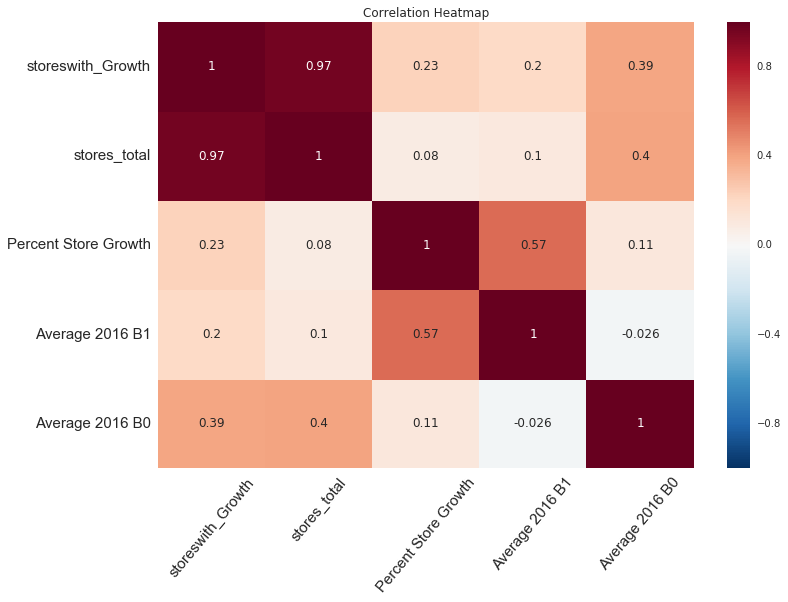

In [49]:
%matplotlib inline
import seaborn as sns
import matplotlib, matplotlib.pyplot as plt

# initializing subplots allows changing of font size
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Change font size
matplotlib.rcParams.update({'font.size': 12})

# Sets x/y label sizes
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

plot = sns.heatmap(coefs, annot=True, ax=ax) #ax=ax ties configuration parameters to plot
plot.set_title("Correlation Heatmap")
plt.xticks(rotation=50) 
# plot.set_xticklabels(rotation=30)


Percentage of Stores growing correlates to slope B1, as expected.
The Number of Total Stores in a city also correlates to the Average Starting Sales in 2015.
That makes sense because if there is a bigger market, with stores making money, that would attract a greater amount of stores in the city.

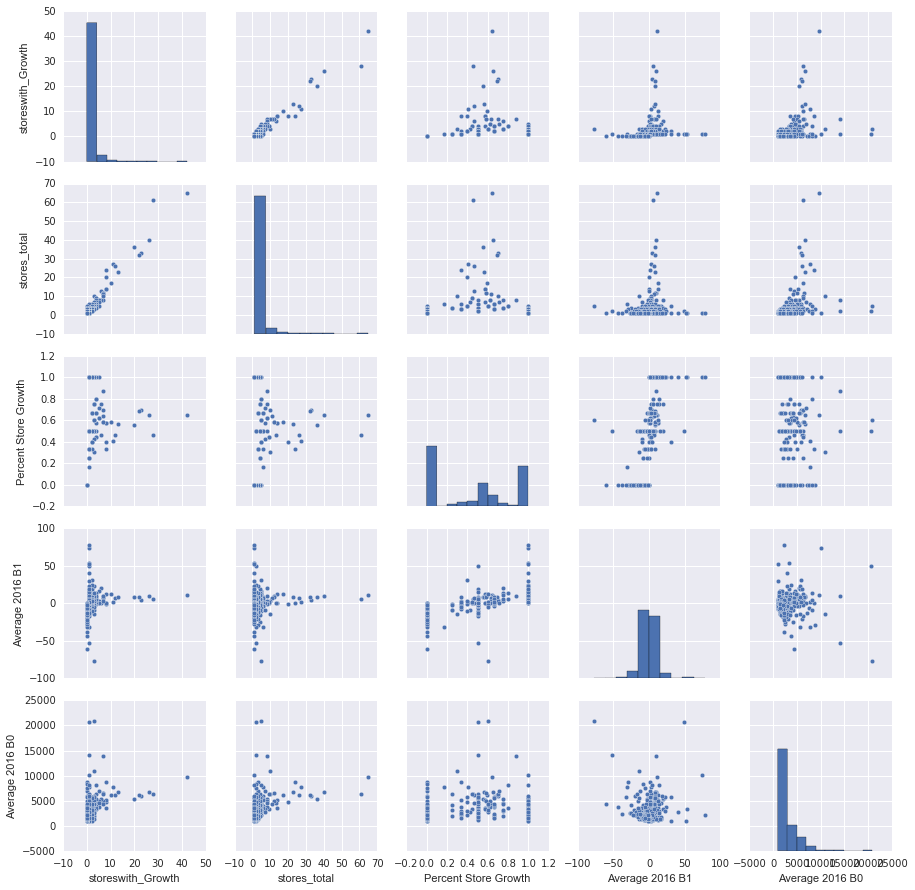

In [50]:
pairs = sns.pairplot(LM_summary)

Probably a good idea to look at growth rate of number of stores/city  over time as another factor
For now, I think although the model has high variance, 

Let's look at Average Margin/Store by Cities again to double check our choice
But Normalize by store this time. If I had time, I'd divide by Number of stores/ time instead of average number of stores.

In [51]:
#Earlier Time Scale graph
subset_dfa0.head(2)

LUT_store_number = pd.DataFrame()
LUT_store_number["City"] = LM_summary["City"]
LUT_store_number["stores_total"] = LM_summary["stores_total"]


subset_time_df = pd.DataFrame()

subset_time_df = pd.merge(subset_dfa0, LUT_store_number, how='left', on='City')

subset_time_df['Store Avg Margin'] = subset_time_df["Margin"]*1.0/subset_time_df["stores_total"]
subset_time_df.sort_index(by=['Store Avg Margin'], ascending = False, inplace=True)
subset_time_df.head(10)


/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,City,Margin,stores_total,Store Avg Margin
28,MOUNT VERNON,9.133297e+05,2.0,456664.830000
4,BETTENDORF,4.427798e+06,10.0,442779.828000
15,WINDSOR HEIGHTS,2.002042e+06,5.0,400408.442000
1,WEST DES MOINES,8.257453e+06,27.0,305831.576296
13,CORALVILLE,2.289780e+06,8.0,286222.483750
74,OTTUWMA,2.721805e+05,1.0,272180.490000
42,MILFORD,5.014283e+05,2.0,250714.155000
0,DES MOINES,1.483502e+07,65.0,228231.057846
80,ANAMOSA,2.228449e+05,1.0,222844.880000
51,CHARLES CITY,4.250826e+05,2.0,212541.280000


In [52]:
LM_summary = pd.merge(LM_summary, subset_time_df, how='left', on=['City','stores_total'])
LM_summary.sort_index(by=['Store Avg Margin','Average 2016 B0'], ascending = False, inplace=True)
LM_summary.head(20)

/Users/noriogura/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,City,storeswith_Growth,stores_total,Percent Store Growth,Average 2016 B1,Average 2016 B0,Margin,Store Avg Margin
127,MOUNT VERNON,1,2,0.500000,49.191735,20678.279171,9.133297e+05,456664.830000
19,BETTENDORF,3,10,0.300000,-13.740004,10960.478480,4.427798e+06,442779.828000
46,WINDSOR HEIGHTS,3,5,0.600000,-77.336073,20820.766087,2.002042e+06,400408.442000
6,WEST DES MOINES,11,27,0.407407,2.077206,7779.749290,8.257453e+06,305831.576296
22,CORALVILLE,7,8,0.875000,9.148183,13984.031181,2.289780e+06,286222.483750
216,OTTUWMA,1,1,1.000000,73.774531,10154.757147,2.721805e+05,272180.490000
125,MILFORD,1,2,0.500000,-52.696517,14040.242732,5.014283e+05,250714.155000
0,DES MOINES,42,65,0.646154,11.145001,9744.260053,1.483502e+07,228231.057846
167,ANAMOSA,1,1,1.000000,53.197154,3288.365538,2.228449e+05,222844.880000
152,CHARLES CITY,0,2,0.000000,-5.854685,7587.696500,4.250826e+05,212541.280000


In [53]:
# Filter for City Potentials

LM_filtered = LM_summary

# Filter for Cities > 1 Store total in data, not enough data... our store backer is conservative
LM_filtered = LM_filtered[LM_filtered["stores_total"] > 1]

# Filter for Percent Store Growth > 0.5 (More than 50% stores are growing)... again our store backer is conservative
LM_filtered = LM_filtered[LM_filtered["Percent Store Growth"] > 0.45]

# Filter for Average Store Margin > 150k 
LM_filtered = LM_filtered[LM_filtered["Store Avg Margin"] > 150000]

# Filter for Average 2016 B1 > 0 (Average slope is not loosing margin)
LM_filtered = LM_filtered[LM_filtered["Average 2016 B1"] > 0]


LM_filtered

,City,storeswith_Growth,stores_total,Percent Store Growth,Average 2016 B1,Average 2016 B0,Margin,Store Avg Margin
127,MOUNT VERNON,1,2,0.500000,49.191735,20678.279171,9.133297e+05,456664.830000
22,CORALVILLE,7,8,0.875000,9.148183,13984.031181,2.289780e+06,286222.483750
0,DES MOINES,42,65,0.646154,11.145001,9744.260053,1.483502e+07,228231.057846
39,CARROLL,4,5,0.800000,13.176644,8170.885038,8.723380e+05,174467.600000
32,OSKALOOSA,4,6,0.666667,4.212772,3915.791158,9.860408e+05,164340.126667


In [54]:
## Check Time scale Store Avg Margin for Possible Cities

#Change over time, of Top City
a = ["MOUNT VERNON","CORALVILLE","DES MOINES","CARROLL"]
subset2 = s2d[s2d["City"].isin(a)]
subset2 = subset2.groupby(["City", "Year","Month"]).agg({'Margin':sum})
subset2_df = pd.DataFrame(subset2).reset_index()

subset2_df = pd.merge(subset2_df, LUT_store_number, how='left', on='City')
subset2_df["Store_Avg_Margin"] = subset2_df["Margin"]*1.0/subset2_df["stores_total"]


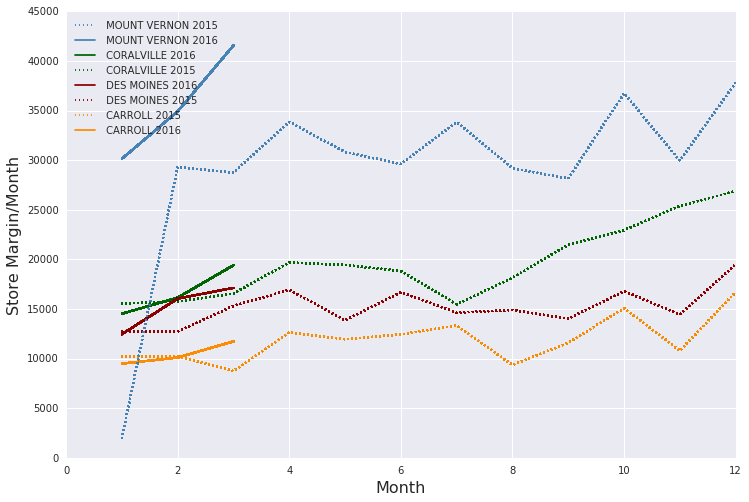

In [55]:
#print subset2_df.head(20)

cities = subset2_df.City.values
seq_year = subset2_df.Year.values

seq_month = subset2_df.Month.values
total_margin = subset2_df.Store_Avg_Margin.values

#plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))
axes = fig.gca()

for g in cities:
    
    if g == 'DES MOINES':
        color = 'darkred'
    elif g == 'MOUNT VERNON':
        color = 'steelblue'
    elif g == 'CORALVILLE':
        color = 'darkgreen'
    elif g == 'CARROLL':
        color = 'darkorange'
            
    for r in seq_year:
        
        if r == 2015:            
            linestyle = ':'
        elif r == 2016:
            linestyle = '-' 
        
        current_cities = [x for x, g_, r_ in zip(seq_month, cities, seq_year) if g_ == g and r_ == r]
        current_margin = [y for y, g_, r_ in zip(total_margin, cities, seq_year) if g_ == g and r_ == r]

        axes.plot(current_cities, current_margin, linestyle=linestyle, c=color, label=' '+g+" "+str(r))
        
        
axes.set_xlabel('Month', fontsize=16)
axes.set_ylabel('Store Margin/Month', fontsize=16)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = {l:h for l, h in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), loc = 'upper left')

Recommend looking at these 4 cities for store locations - for greatest margin per store and for growth.
Note that Des Moines which had the largest market overall, is more of a saturated market than Mount Vernon.
It may be a safer bet, since more stores have survived (65) compared to Mount Vernon's 2.
Would be nice to add range on the plots. 